# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [100]:
path='credit_3530903_70302.csv'
credit_df = pd.read_csv(path, index_col=0)

In [101]:
credit_df.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,male single,real estate,67.0,own,2.0,skilled,1.0,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,female div/dep/mar,real estate,22.0,own,1.0,skilled,1.0,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,male single,real estate,49.0,own,1.0,unskilled resident,2.0,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,male single,life insurance,45.0,for free,1.0,skilled,2.0,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,male single,no known property,53.0,for free,2.0,skilled,2.0,yes,bad


1. checking_status - порядковая 

duration - абсолютная

credit_history - номинальная

purpose - номинальная

credit_amount - абсолютная

savings_status - порядковая

employment - порядковая

personal_status - номинальная

property_magnitude - номинальная

age - абсолютная

housing - номинальная

existing_credits - абсолютная

job - номинальная

num_dependents - абсолютная

foreign_worker - номинальная

class - номинальная

In [102]:
credit_df.describe()

,duration,credit_amount,age,existing_credits,num_dependents
count,501.000,501.000,501.000,501.000,501.000
mean,20.315,3344.756,35.605,1.393,1.144
std,12.103,5154.839,11.740,0.568,0.351
min,4.000,0.000,15.000,1.000,1.000
25%,12.000,1288.000,27.000,1.000,1.000
50%,18.000,2197.000,33.000,1.000,1.000
75%,24.000,3915.000,42.000,2.000,1.000
max,60.000,100042.000,89.000,4.000,2.000


2.
Дисперсия - std^2.
Значит признак с наименьшей дисперсией обладает наименьшим по модулю std.
Признак с наименьшей дисперсией - num_dependents

In [103]:
credit_df.groupby('class').mean()

,duration,credit_amount,age,existing_credits,num_dependents
class,,,,,
bad,25.255,4806.358,35.029,1.380,1.153
good,18.456,2794.648,35.821,1.398,1.140


3. Признак наиболее отлицающийся для двух классов - credit_amount

In [104]:
credit_df[credit_df['job']=='skilled'].groupby('class').job.count()

class
bad      80
good    232
Name: job, dtype: int64

4. Больше всего skilled работников в классе 'good'

# Поиск выбросов

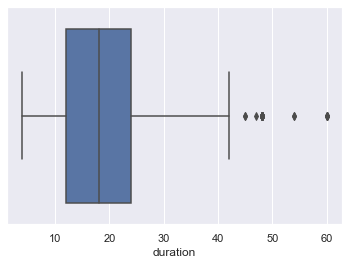

In [105]:
sns.boxplot(x='duration', data=credit_df)

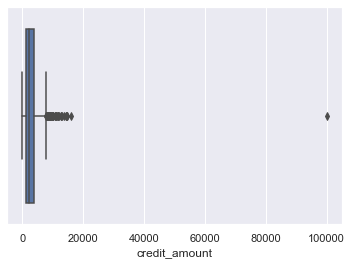

In [106]:
sns.boxplot(x='credit_amount', data=credit_df)

In [107]:
credit_df[credit_df['credit_amount']>credit_df.credit_amount.quantile(0.95)].sort_values(['credit_amount'], ascending=[0]).head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
419,0<=X<200,18.0,existing paid,new car,100042.0,no known savings,1<=X<4,female div/dep/mar,life insurance,33.0,own,1.0,skilled,1.0,yes,bad
95,0<=X<200,54.0,no credits/all paid,not applicable,15945.0,<100,<1,male single,no known property,58.0,rent,1.0,skilled,1.0,yes,bad
374,0<=X<200,60.0,all paid,other,14782.0,100<=X<500,>=7,female div/dep/mar,no known property,60.0,for free,2.0,high qualif/self emp/mgmt,1.0,yes,bad
236,0<=X<200,6.0,existing paid,new car,14555.0,no known savings,unemployed,male single,life insurance,23.0,own,1.0,unemp/unskilled non res,1.0,yes,bad
63,0<=X<200,48.0,no credits/all paid,not applicable,14421.0,<100,1<=X<4,male single,car,25.0,own,1.0,skilled,1.0,yes,bad


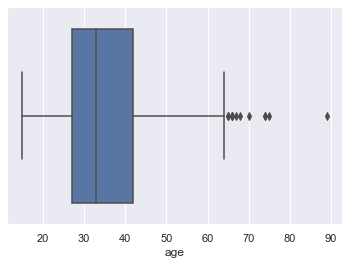

In [108]:
sns.boxplot(x='age', data=credit_df)

5. Однозначно сказать есть ли выбросы по признакам, отображенным выше, нельзя.
Скорее всего имеет место выброс в сумме кредита, однако, это может являться особенностью данных: возможно представить ситацию, в который человек берет кредит на машину в 100000$, так же очевидно, что такие случаи очень редки.

In [109]:
# Заменим симантически пустые значения как NaN
credit_df['checking_status'] = credit_df['checking_status'].replace('no checking', np.NaN)
credit_df['savings_status'] = credit_df['savings_status'].replace('no known savings', np.NaN)
credit_df.isnull().sum().sum()

309

6. Число пропушенных значений в наборе - 309 

In [110]:
credit_df = credit_df.fillna('Unknown')
credit_df.isnull().sum()

checking_status       0
duration              0
credit_history        0
purpose               0
credit_amount         0
savings_status        0
employment            0
personal_status       0
property_magnitude    0
age                   0
housing               0
existing_credits      0
job                   0
num_dependents        0
foreign_worker        0
class                 0
dtype: int64

7. Заменяем командой fillna()

# 8. Диаграммы для всех типов признаков

Диаграмма для качественного типа признака

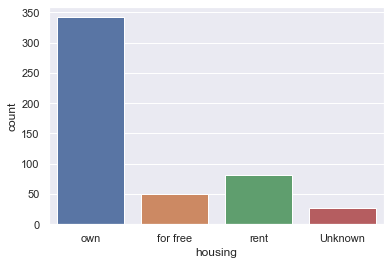

In [111]:
sns.countplot(x='housing', data=credit_df);

Диаграмма для бинарного типа признаков

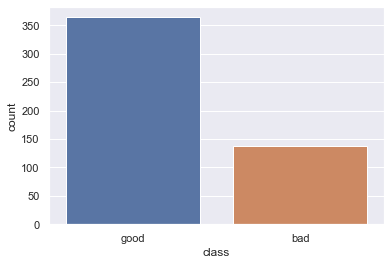

In [112]:
sns.countplot(x='class', data=credit_df);

Диаграмма для колличесвенного типа признаков

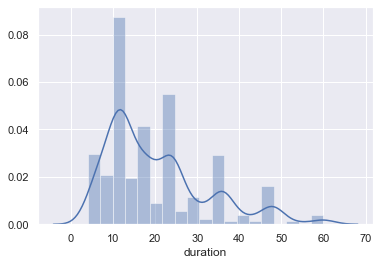

In [113]:
sns.distplot(credit_df.duration)

# 9. Поиск взаимосвязей признаков с использованием тепловой карты и scatter-plot

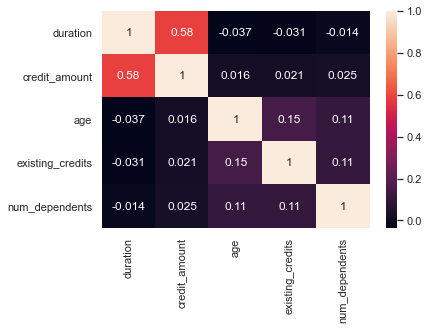

In [114]:
credit_df = credit_df.drop(419) # Удаляем веротяный выброс
sns.heatmap(credit_df.corr(), annot=True, annot_kws={"size":12})

Время выплаты кредита коррелируется с его размером. Так же колличесво кредитов связанно с возрастом.

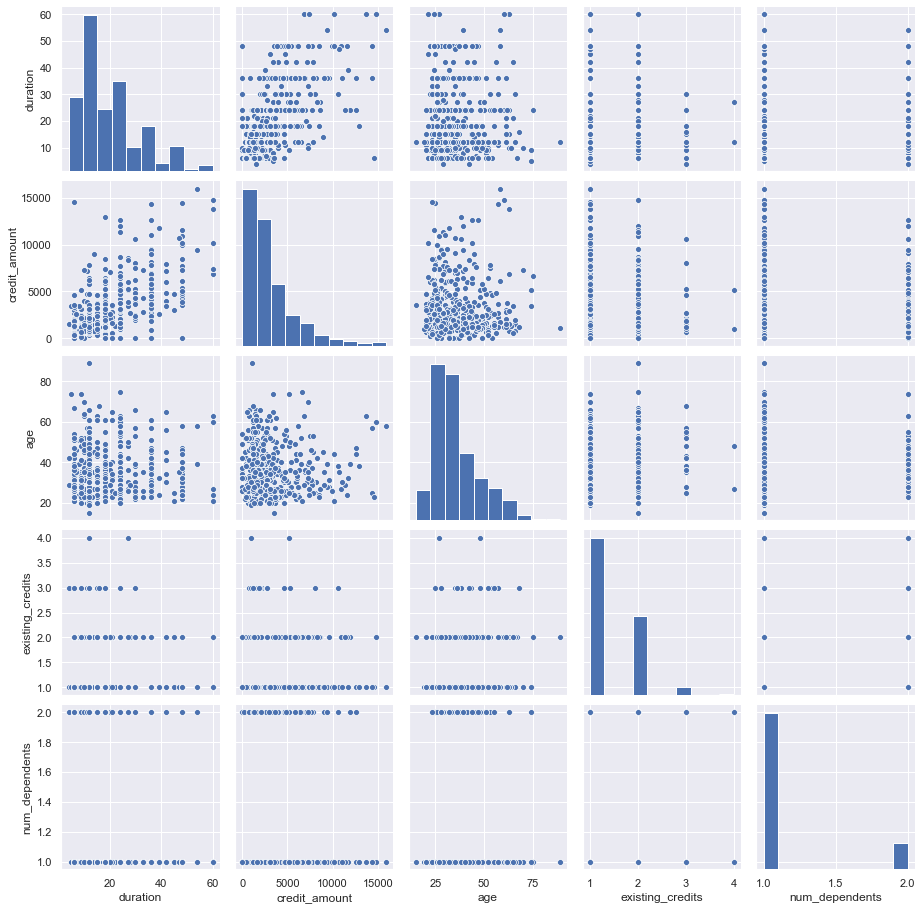

In [115]:
sns.pairplot(credit_df)

Более молодые люди чаше берут берут более маленькие кредиты на более мелкие сроки. Люди в возрасте берут меньше кредитов и реже на большие суммы. Длительность кредита зависит от его размера.

10. Обычно набор данных содержит переменные разного масштаба. Например, в имеющемся наборе данных содержится столбец Age со значениями по шкале 20-90+ и столбец Credit amount со значениями по шкале ~1000-100000+.
Поскольку эти два столбца отличаются по масштабу, чтобы иметь общий масштаб при построении модели машинного обучения, их необходимо стандартизировать, то есть привести данные к виду, где математическое ожидание будет равно 0, а стандартное отклонение будет равно 1


11. Рабочий стаж на последнем месте работы
(порядковая шкала)
Данный признак показывает, как долго человек устроен на своем последнем месте работы. Данная информация поможет выяснить, находится ли человек на испытательном сроке/закрепился ли он на рабочем месте. Это поможет избежать риска того, что вскоре после получения кредита у человека возникнут проблемы, и он останется без работы.